# Avocado Project

# Problem Statement:

Here, we are predicting the city or region with the help of various variables.
We will be using classifciation model as our target variable has categorical data with more than 2 categories

# Importing Required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# Loading the dataset

In [2]:
df=pd.read_csv("avocado.csv")
df

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,conventional,2015,Albany
1,1,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,conventional,2015,Albany
2,2,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,conventional,2015,Albany
3,3,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,conventional,2015,Albany
4,4,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,conventional,2015,Albany
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1512,10,16-10-2016,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,conventional,2016,Charlotte
1513,11,09-10-2016,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,conventional,2016,Charlotte
1514,12,02-10-2016,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,conventional,2016,Charlotte
1515,13,25-09-2016,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,conventional,2016,Charlotte


# Data Pre-processing

In [3]:
df.columns

Index(['Unnamed: 0', 'Date', 'AveragePrice', 'Total Volume', '4046', '4225',
       '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type',
       'year', 'region'],
      dtype='object')

In [4]:
df.isnull().sum()

Unnamed: 0      0
Date            0
AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

No null value

In [5]:
df.dtypes

Unnamed: 0        int64
Date             object
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

From above it can be seen:
    Columns having object dtypes are: 'Date','type' and 'region'
        others are float or integers
        
        Hence, we need to do the label encoding for columns having categories/charachters

In [6]:
#dropping not useful column
df.drop(['Date'], axis=1, inplace=True)

In [7]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [8]:
#Encoding

In [9]:
import sklearn
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

df['type']=le.fit_transform(df['type'])

df['region']=le.fit_transform(df['region'])

In [10]:
df.head()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,0,2015,0
1,1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,0,2015,0
2,2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,0,2015,0
3,3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,0,2015,0
4,4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,0,2015,0


In [11]:
df.tail()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
1512,10,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,0,2016,7
1513,11,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,0,2016,7
1514,12,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,0,2016,7
1515,13,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,0,2016,7
1516,14,1.43,182978.30,43116.41,54193.42,16563.91,69104.56,57456.21,11648.35,0.00,0,2016,7


In [12]:
df['type']

0       0
1       0
2       0
3       0
4       0
       ..
1512    0
1513    0
1514    0
1515    0
1516    0
Name: type, Length: 1517, dtype: int32

In [13]:
df['region']

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1517, dtype: int32

In [14]:
df['region'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50])

In [15]:
df.dtypes

Unnamed: 0        int64
AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int32
year              int64
region            int32
dtype: object

# Statistical Summary

In [16]:
df.describe()

,Unnamed: 0,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
count,1517.000000,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.0,1517.000000,1517.000000
mean,26.995386,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,0.0,2015.162821,21.196440
std,14.848287,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.0,0.369324,16.132398
min,0.000000,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,0.0,2015.000000,0.000000
25%,14.000000,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,0.0,2015.000000,6.000000
50%,29.000000,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,0.0,2015.000000,19.000000
75%,39.000000,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,0.0,2015.000000,35.000000
max,51.000000,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,0.0,2016.000000,50.000000


Key observation:
    1. All the count is same, so no Nan values present
    2. there is a difference between mean, median and max values in '4046','4770','Total Bags'etc., hence there could be presence of outliers
    

# EDA

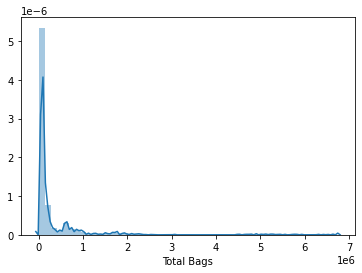

In [17]:
#Checking skewness
sns.distplot(df['Total Bags'])

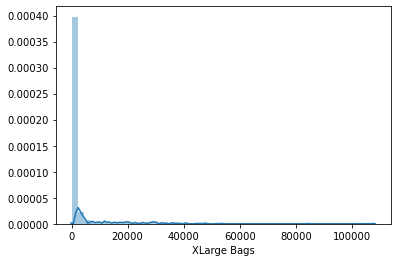

In [18]:
sns.distplot(df['XLarge Bags'])

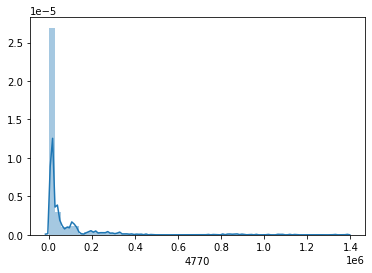

In [19]:
sns.distplot(df['4770'])

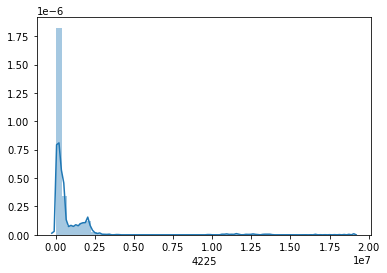

In [20]:
sns.distplot(df['4225'])

Observation:lots of skewness is present in the data

In [21]:
df.skew()

Unnamed: 0     -0.234824
AveragePrice   -0.109444
Total Volume    6.200138
4046            6.051830
4225            6.394926
4770            5.405164
Total Bags      5.366378
Small Bags      5.355185
Large Bags      5.144495
XLarge Bags     5.775077
type            0.000000
year            1.828332
region          0.288146
dtype: float64

will be treating the skewness

In [22]:
df.columns

Index(['Unnamed: 0', 'AveragePrice', 'Total Volume', '4046', '4225', '4770',
       'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year',
       'region'],
      dtype='object')

In [23]:
#Checking Correlation

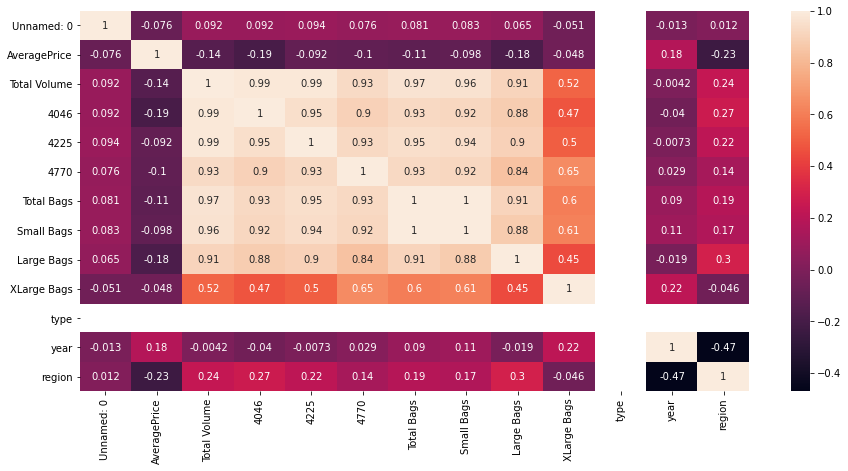

In [24]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,)

We can observe the following:
    1.target variable having +ve correlation with Total volume, 4046, 4225, 4770 etc the correlation is distributed among various columns
    2.year have strong -ve correlation with the target variable(region)
    3. type has no relation at all as it is only 1 type, so we can drop the same.

In [25]:
#dropping not useful column
df.drop(['type'], axis=1, inplace=True)

In [26]:
df.drop(['Unnamed: 0'], axis=1, inplace=True)

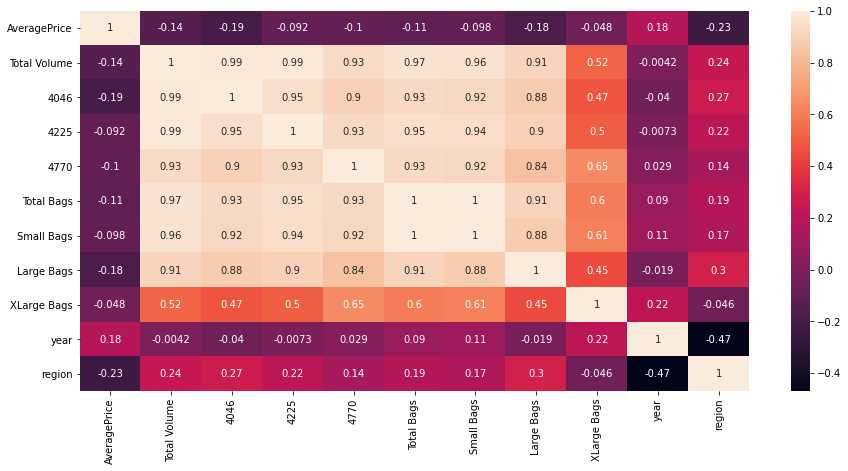

In [27]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,)

Getting better view now

In [28]:
#Checking and handling Outliers

In [29]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

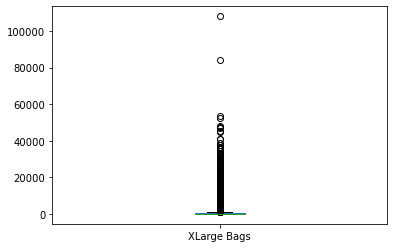

In [30]:
df['XLarge Bags'].plot.box()

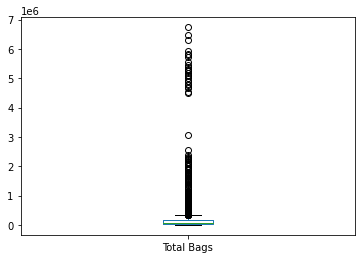

In [31]:
df['Total Bags'].plot.box()

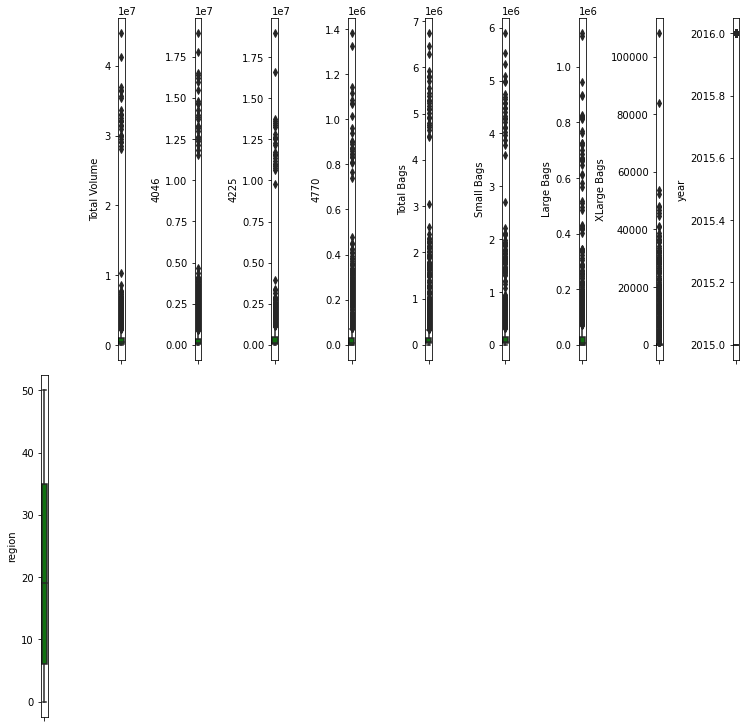

In [32]:
collist=df.columns.values
ncol=10
nrows=6

plt.figure(figsize=(ncol,3*ncol))
for i in range(1,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df[collist[i]], color='green', orient='v')
    plt.tight_layout()

Can observe, lots of outliers present in almost all the columns

In [33]:
#removing outliers using zscore method

from scipy.stats import zscore
import numpy as np
z=np.abs(zscore(df))
threshold=3
new_df=df[(z<3).all(axis=1)]

In [34]:
df.shape

(1517, 11)

In [35]:
new_df.shape

(1436, 11)

In [36]:
Percentage_loss=((1517-1436)/1517)*100
Percentage_loss

5.339485827290705

Not much data loss is there

In [37]:
#Removing Skewness now

In [38]:
#first, we are defining the x & y
x=new_df.iloc[:,:-1]
y=new_df.iloc[:,-1]

In [39]:
x

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
0,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.00,2015
1,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.00,2015
2,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.00,2015
3,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.00,2015
4,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.00,2015
...,...,...,...,...,...,...,...,...,...,...
1512,1.39,190846.01,57529.11,56366.66,17531.78,59418.46,48823.53,10354.65,240.28,2016
1513,1.51,178235.75,43325.87,52189.61,19419.57,63300.70,54704.14,8596.56,0.00,2016
1514,1.48,178410.82,46364.75,52893.38,16736.92,62415.77,53332.61,8258.16,825.00,2016
1515,1.47,189131.52,54110.79,53593.58,17495.42,63931.73,55653.47,8278.26,0.00,2016


In [40]:
y

0       0
1       0
2       0
3       0
4       0
       ..
1512    7
1513    7
1514    7
1515    7
1516    7
Name: region, Length: 1436, dtype: int32

In [41]:
#Now, removing skewness from the x variables only

In [42]:
from sklearn.preprocessing import power_transform

x=power_transform(x,method='yeo-johnson')

# Model Building

In [43]:
#Scaling

In [44]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x=sc.fit_transform(x)

In [45]:
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC


from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [46]:
#splitting the data

In [47]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.22,random_state=43)

In [48]:
#Checking different models

In [49]:
svc=SVC(kernel='rbf')

svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)

print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.8829113924050633
[[14  0  0 ...  0  0  0]
 [ 0 10  0 ...  1  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  8]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.83      0.91      0.87        11
           2       0.84      1.00      0.91        16
           3       1.00      1.00      1.00        16
           4       1.00      0.92      0.96        13
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      1.00      1.00         5
           9       0.83      1.00      0.91        10
          10       0.67      0.67      0.67         3
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         8
          13       0.89      1.00      0.94         8
          14  

In [50]:
dtc=DecisionTreeClassifier(criterion='gini')

dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)

print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8924050632911392
[[15  0  0 ...  0  0  0]
 [ 0  9  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  6  0  0]
 [ 0  0  0 ...  0  2  0]
 [ 0  0  0 ...  0  0  5]]
              precision    recall  f1-score   support

           0       0.94      1.00      0.97        15
           1       0.82      0.82      0.82        11
           2       0.89      1.00      0.94        16
           3       1.00      1.00      1.00        16
           4       0.92      0.92      0.92        13
           5       1.00      1.00      1.00         5
           6       1.00      1.00      1.00         9
           7       0.80      0.67      0.73         6
           8       1.00      0.80      0.89         5
           9       0.90      0.90      0.90        10
          10       0.75      1.00      0.86         3
          11       1.00      1.00      1.00         8
          12       1.00      1.00      1.00         8
          13       1.00      0.75      0.86         8
          14  

In [51]:
knn=KNeighborsClassifier(10)

knn.fit(x_train,y_train)
predknn=knn.predict(x_test)

print(accuracy_score(y_test,predknn))
print(confusion_matrix(y_test,predknn))
print(classification_report(y_test,predknn))

0.8860759493670886
[[14  0  0 ...  0  0  0]
 [ 0 11  0 ...  0  0  0]
 [ 0  0 16 ...  0  0  0]
 ...
 [ 0  0  0 ...  4  0  0]
 [ 0  0  0 ...  0  3  0]
 [ 0  0  0 ...  0  0  7]]
              precision    recall  f1-score   support

           0       1.00      0.93      0.97        15
           1       0.85      1.00      0.92        11
           2       0.76      1.00      0.86        16
           3       1.00      0.94      0.97        16
           4       1.00      0.92      0.96        13
           5       1.00      0.80      0.89         5
           6       1.00      1.00      1.00         9
           7       1.00      1.00      1.00         6
           8       1.00      0.60      0.75         5
           9       0.83      1.00      0.91        10
          10       0.67      0.67      0.67         3
          11       0.89      1.00      0.94         8
          12       1.00      1.00      1.00         8
          13       0.89      1.00      0.94         8
          14  

Since the best performing model is knn with almost 89% accuracy we will save that model for our future prediction

# Model Saving

In [52]:
import pickle
filename= 'avocado_region.pkl'
pickle.dump(knn, open(filename, 'wb'))

# Conclusion

In [53]:
import numpy as np
a=np.array(y_test)
predicted=np.array(knn.predict(x_test))

df_con=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con

,original,predicted
0,29,23
1,50,50
2,32,32
3,43,43
4,50,50
...,...,...
311,0,22
312,0,0
313,15,13
314,34,34


We can observe, some are predicted well but there are some values which are still not perfectly predicted

# Target:Average_Price

Now, we are doing the prediction of average price of the Avocado.
As the 'average price' is the continous data will use the Regression method to get the predictions and solve this problem

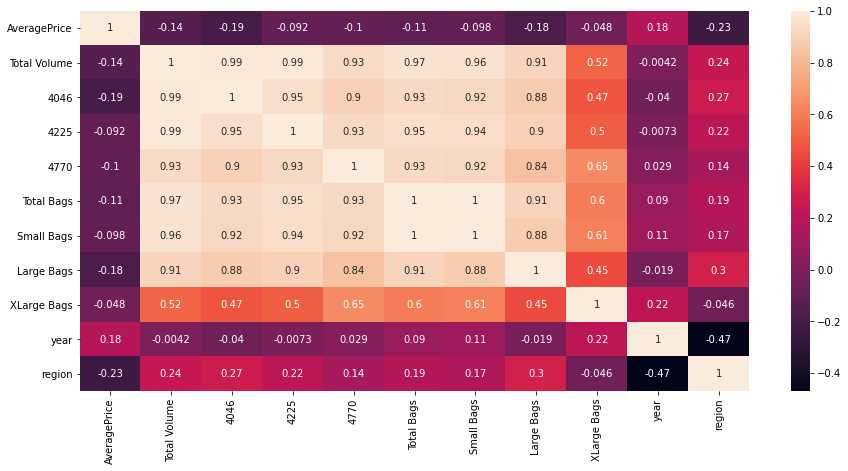

In [54]:
plt.figure(figsize=(15,7))
sns.heatmap(df.corr(),annot=True,)

Key observations:
    1. only year has +ve correlation(0.18) with the AveragePrice
    2. Rest all columns has negative correlation with target
    3.'4225','Small Bags'and 'XLarge Bags' has weak -ve correlation with the target variables. Hence, we can think about dropping the same as having skewness and outliers presence in them.
    But as we have already treated the skewness and removed outliers, we can go ahead with model training and testing.

# Model Building

In [55]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'year', 'region'],
      dtype='object')

In [56]:
#we are defining the x & y
x_p=new_df.drop('AveragePrice',axis=1)
y_p=new_df['AveragePrice']

As we have defined x & y again, will treat skewness again

In [57]:
from sklearn.preprocessing import power_transform

x_p=power_transform(x_p,method='yeo-johnson')

In [58]:
#scaling

In [59]:
sc=StandardScaler()
x_p=sc.fit_transform(x_p)

In [60]:
#Finding best Random_state

In [61]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score

In [62]:
best_rstate=0
accu=0
for i in range(30,200):
    x_train,x_test,y_train,y_test=train_test_split(x_p,y_p, test_size= .25, random_state=i)
    mod=LinearRegression()
    mod.fit(x_train,y_train)
    y_pred=mod.predict(x_test)
    tempaccu=r2_score(y_test,y_pred)
    if tempaccu>accu:
        accu=tempaccu
        best_rstate=i
        
print(f"Best accuracy {accu*100}found on random_state{best_rstate}")

Best accuracy 43.74252144430767found on random_state57


In [63]:
x_train,x_test,y_train,y_test=train_test_split(x_p,y_p, test_size= .25, random_state=57)

In [64]:
#Finding the best Model

In [65]:
LR=LinearRegression()
LR.fit(x_train,y_train)
y_pred=LR.predict(x_test)

r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(LR,x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=43.74252144430767,cross_val_score=31.88305043425232 & difference=11.859471010055351


In [69]:
from sklearn.linear_model import SGDRegressor
SGD=SGDRegressor()
SGD.fit(x_train,y_train)
y_pred=SGD.predict(x_test)

r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(SGD,x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=42.167630009655795,cross_val_score=30.221023579011653 & difference=11.946606430644142


In [66]:
from sklearn.ensemble import RandomForestRegressor
RF=RandomForestRegressor()
RF.fit(x_train,y_train)
y_pred=RF.predict(x_test)

r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(RF,x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=78.84515833466612,cross_val_score=80.43655752543029 & difference=-1.5913991907641645


In [68]:
from sklearn.ensemble import AdaBoostRegressor
ADB=RandomForestRegressor()
ADB.fit(x_train,y_train)
y_pred=ADB.predict(x_test)

r2score=r2_score(y_test,y_pred)
cvscore=cross_val_score(ADB,x_train,y_train,cv=5).mean()

print(f"Accuracy={r2score*100},cross_val_score={cvscore*100} & difference={(r2score*100)-(cvscore*100)}")

Accuracy=79.05202388263082,cross_val_score=80.164398322808 & difference=-1.1123744401771773


It can be clearly observed that AdaBoostRegressor Model is performing the best with 79.05 accuracy. Hence will save this model.

# Model Saving

In [70]:
import pickle
filename= 'avocado_AvgPrice.pkl'
pickle.dump(ADB, open(filename, 'wb'))

# Conclusion

In [71]:
import numpy as np
a=np.array(y_test)
predicted=np.array(ADB.predict(x_test))

df_con2=pd.DataFrame({'original':a,'predicted':predicted}, index= range(len(a)))
df_con2

,original,predicted
0,1.17,1.1452
1,1.10,1.0635
2,1.09,1.0594
3,1.05,1.1466
4,1.11,1.1190
...,...,...
354,0.71,0.6859
355,1.02,1.0070
356,0.91,0.9136
357,1.30,1.2214


In [ ]:
From above, it can be seen that the model is performing with 70 to 80% accuracy